# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Rectangular Apertures
***

The rectangular aperture is one of the most common microwave antennas.   In radar applications, the aperture opening is typically covered to protect from environmental conditions such as moisture and dirt.  The following sections consider rectangular with various field distributions on the aperture.

### Uniform Distribution in a Ground Plane
Consider a rectangular aperture with a uniform field distribution on an infinite ground plane, as illustrated in Figure 3.9.  The uniform field distribution in the aperture is given by (Equation 3.58)

$$
\vec{E}_a =
	\begin{cases}
		 E_0\, \hat{y} & \text{for }\hspace{5pt} -a/2 \leq x' \leq a/2, -b/2 \leq y' \leq b/2 \\[5pt]
        0 & \text{otherwise}
	\end{cases}\hspace{0.3in} \text{(V/m)},	 
$$

The far zone electric and magnetic fields are given in Equations 3.59 - 3.63


### Uniform Distribution in Free Space
The next rectangular aperture studied has a uniform field distribution but is now in free space rather than on an infinite ground plane, as illustrated in Figure 3.11.  The field distribution for this case is given by (Equation 3.65)


$$
    \vec{E}_a = 
    \begin{cases}
        E_0\, \hat{y} & \text{for }\hspace{5pt} -a/2 \leq x' \leq a/2, -b/2 \leq y' \leq b/2 \\[5pt]
        0 & \text{otherwise}
    \end{cases}\hspace{0.3in} \text{(V/m)},
$$

The far zone electric and magnetic fields are then found from Equations 3.67 - 3.71

### TE10 Distribution in a Ground Plane
The final rectangular aperture analyzed has a field distribution of the TE10 waveguide mode and is in an infinite ground plane, as shown in Figure 3.12. The field distribution for the TE10 mode is given by (Equation 3.72)

$$
    \vec{E}_a = 
    \begin{cases}
        E_0\, \cos \Big( \dfrac{\pi x}{a}\Big)  \, \hat{y} & \text{for }\hspace{5pt} -a/2 \leq x' \leq a/2, -b/2 \leq y' \leq b/2 \\[5pt]
        0 & \text{otherwise}
    \end{cases} \hspace{7pt}\text{(V/m)},
$$

where $E_0$ is a constant.  The far zone electric and magnetic fields are given by Equations 3.73 - 3.77
***

Begin by getting the library path

In [1]:
import lib_path

Set the frequency (Hz), the aperture width (m) and the aperture height (m)

In [2]:
frequency = 1e9

width = 0.2

height = 0.3

Set up the angular arrays (radians) using the `linspace` and `meshgrid` routines from `scipy`

In [3]:
from numpy import meshgrid, linspace, finfo

from scipy.constants import pi


n = 200

m = int(n/4)

theta, phi = meshgrid(linspace(finfo(float).eps, 0.5 * pi, n), linspace(finfo(float).eps, 2.0 * pi, n))

Calculate the antenna parameters and antenna patterns for the rectangular uniform aperture in a ground plane or a rectangular uniform aperture in free space or a rectangular aperture with TE10 field distribution 

In [4]:
from Libs.antenna.aperture import rectangular_uniform_ground_plane, rectangular_uniform_free_space, rectangular_te10_ground_plane


antenna_type = 'rectangular_te10_ground_plane'


if antenna_type == 'rectangular_uniform_ground_plane':

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_uniform_ground_plane.beamwidth(width, height, frequency)

    directivity = rectangular_uniform_ground_plane.directivity(width, height, frequency)

    sidelobe_level_eplane = rectangular_uniform_ground_plane.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = rectangular_uniform_ground_plane.far_fields(width, height, frequency, 1e9, theta, phi)
    
    

elif antenna_type == 'rectangular_uniform_free_space':

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_uniform_free_space.beamwidth(width, height, frequency)

    directivity = rectangular_uniform_free_space.directivity(width, height, frequency)

    sidelobe_level_eplane = rectangular_uniform_free_space.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = rectangular_uniform_free_space.far_fields(width, height, frequency, 1e9, theta, phi)
            
            

else:

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_te10_ground_plane.beamwidth(width, height, frequency)

    directivity = rectangular_te10_ground_plane.directivity(width, height, frequency)

    sidelobe_level_eplane, sidelobe_level_hplane = rectangular_te10_ground_plane.side_lobe_level()

    _, et, ep, _, _, _ = rectangular_te10_ground_plane.far_fields(width, height, frequency, 1e9, theta, phi)

Display the antenna parameters

In [5]:
print('Sidelobe Level E-plane (dB)  {:.2f}'.format(sidelobe_level_eplane))

print('Sidelobe Level H-plane (dB)  {:.2f}'.format(sidelobe_level_hplane))

print('Directivity  {:.2f}'.format(directivity))

Sidelobe Level E-plane (dB)  -13.26
Sidelobe Level H-plane (dB)  -23.00
Directivity  6.80


Set up the U-V coordinates for displaying the antenna pattern

In [6]:
from numpy import sin, cos, sqrt, amax

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Calculate the normalized electric field magnitude

In [7]:
e_mag = sqrt(abs(et * et + ep * ep))

e_mag /= amax(e_mag)

Create the color plot

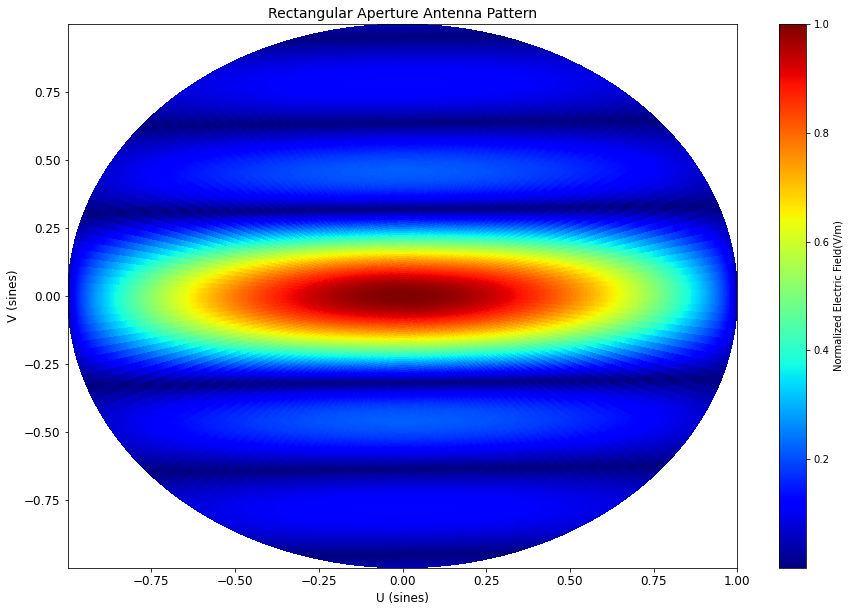

In [8]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Set up the axes

fig, axes1 = plt.subplots()


im = axes1.pcolor(uu, vv, e_mag, cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field(V/m)")



# Set the x- and y-axis labels

axes1.set_xlabel("U (sines)", size=12)

axes1.set_ylabel("V (sines)", size=12)


# Set the plot title and labels

axes1.set_title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

axes1.tick_params(labelsize=12)

Create the contour plot

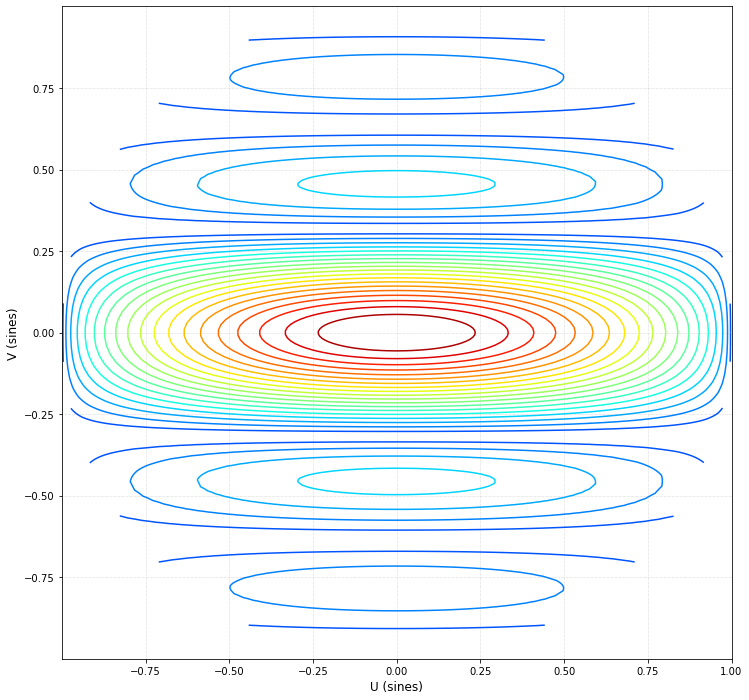

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)



plt.contour(uu, vv, e_mag, 20, cmap="jet", vmin=-0.2, vmax=1.0)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)



# Set the plot title and labels

axes1.set_title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

axes1.tick_params(labelsize=12)

Create the line plot

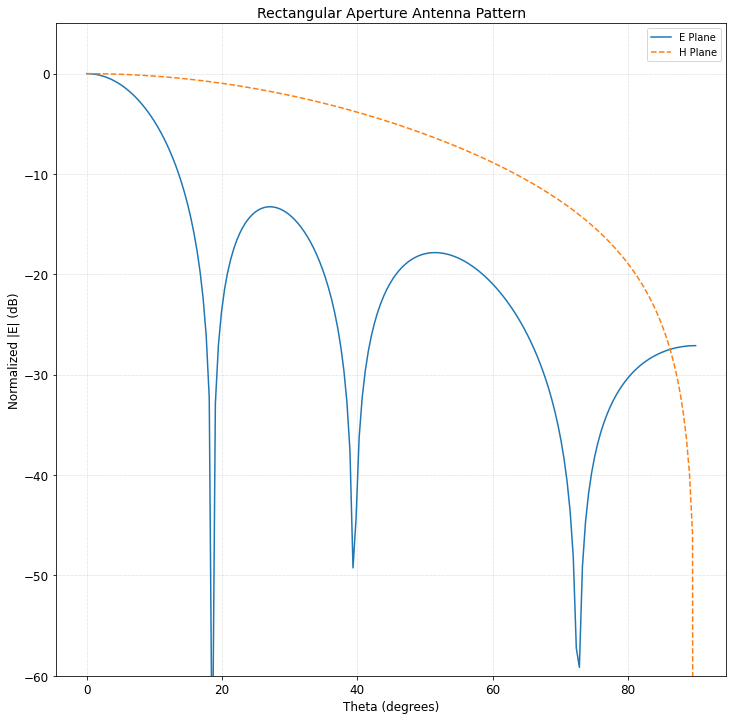

In [10]:
from numpy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[m]), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[0]), '--', label='H Plane')



# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Normalized |E| (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title and labels

plt.title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)